# **Case Avançado**

Judy Hopps, uma coelha da zona rural, vai atrás de seu sonho tornar-se oficial no departamento de polícia da cidade de Zootopia. Juntamente de seu então parceiro Nick, eles vão até o DMV conseguir mais informações para resolverem um caso - e falam com Flecha, um funcionário de lá. Porém, após eles saírem, um amigo de Flecha o questiona se conhece alguém que possa ajudá-lo a analisar informações demográficas de países, com o intuito de implantar novas políticas públicas para Zootopia no futuro. Portanto, o ajudaremos.

In [1]:
# Instalando as bibliotecas que vamos usar
%pip install pandas seaborn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Importando as bibliotecas que serão utilizadas. Contudo, caso se sinta necessidade, importe outras bibliotecas que desejar.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

O amigo de Flecha possui um arquivo .csv que há informações que podem ser úteis para nós. Aqui, vai uma breve informação de cada coluna do DataFrame:

**Descrição das Colunas do DataFrame:**
- **Country**: Nome do país ao qual os dados pertencem.
- **Quality of Life Index**: A qualidade de vida em um país como um todo, abarcando fatores como poder de compra, segurança, poluição e custo de vida.
- **Purchasing Power Index**: Poder de compra médio da população.
- **Safety Index**: Nível de segurança pública em um país,
- **Cost of Living Index**: Custo médio de vida em um país, levando em conta preços de bens e serviços essenciais.
- **Pollution Index**: Nível de poluição ambiental.
- **Climate Index**:  Índice que avalia a qualidade do clima em um país com base em fatores como temperatura, umidade e conforto térmico.
- **Health Care Index**: Nível de qualidade do acesso a saúde.

## **Questão 1**

### **a)** Leia o arquivo "quality_of_life_indices_by_country_2.csv", e o transforme em um data frame do Pandas.

In [27]:
df = pd.read_csv(r'C:\Users\User\Documents\FEA.dev\Case do PS\quality_of_life_indices_by_country_2.csv')
df.columns

Index(['Country', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Pollution Index', 'Climate Index'],
      dtype='object')

### **b)** Podem haver linhas com valores Na. Primeiramente, cheque se há tais linhas, e se sim, as remova.

In [28]:
if df.isna().sum().sum() > 0:
    df = df.dropna()

print(df.isna().sum())

# Acho válido aceitar caso só use df.isna().sum() e depois tire os valores Na, ou caso utilize df.isna().any().any() no if em vez de df.isna().sum().sum()

Country                   0
Quality of Life Index     0
Purchasing Power Index    0
Safety Index              0
Health Care Index         0
Cost of Living Index      0
Pollution Index           0
Climate Index             0
dtype: int64


### **c)** Apesar de haverem outras, vamos utilizar apenas as colunas "Country", "Quality of Life Index" e "Purchasing Power Index". Portanto, exclua as demais.

In [29]:
df = df[['Country', 'Quality of Life Index', 'Purchasing Power Index']]
df.head()

,Country,Quality of Life Index,Purchasing Power Index
0,Austria,192.9,110.0
1,Qatar,193.3,185.7
2,Estonia,185.7,86.0
3,Denmark,209.9,137.3
4,Panama,124.4,47.9


### **d)** Feitas as etapas anteriores, agora encontre e apresente os 5 países com maior qualidade de vida, com base na coluna 'Quality of Life Index'.

In [30]:
df_qli = df.sort_values('Quality of Life Index', ascending=False)[0:5]
df_qli = df_qli[['Country', 'Quality of Life Index']]
df_qli

,Country,Quality of Life Index
47,Luxembourg,220.1
8,Netherlands,211.3
3,Denmark,209.9
83,Oman,208.9
44,Switzerland,205.0


### **e)** Agora faça o mesmo processo para encontrar e apresentar os 5 países com maior poder de compra, com base na coluna "Purchasing Power Index".

In [31]:
df_ppi = df.sort_values('Purchasing Power Index', ascending=False)[0:5]
df_ppi = df_ppi[['Country', 'Purchasing Power Index']]
df_ppi

,Country,Purchasing Power Index
1,Qatar,185.7
47,Luxembourg,184.3
37,Kuwait,180.3
44,Switzerland,164.8
83,Oman,153.8


### **f)** É de grande importância entender o quanto uma variável pode ter haver com a outra, na hora de implementar novas políticas e diretrizes de qualquer assunto. Um bom pontapé nesse caso é entender a correlação de certas variáveis. Portanto, apresente o valor grau de correlação, lembrando que o mesmo pode ir de -1 a 1.

In [32]:
df_correlacao = df[['Quality of Life Index', 'Purchasing Power Index']]
correlacoes = df_correlacao.corr()
print('A correlação entre essas duas variáveis é de', correlacoes.loc['Quality of Life Index', 'Purchasing Power Index'])

A correlação entre essas duas variáveis é de 0.8827892255714079


### **g)** Produza um gráfico de dispersão que contemple os dados das colunas "Purchasing Power Index" e "Quality of Life Index", juntamente de uma reta de regressão.

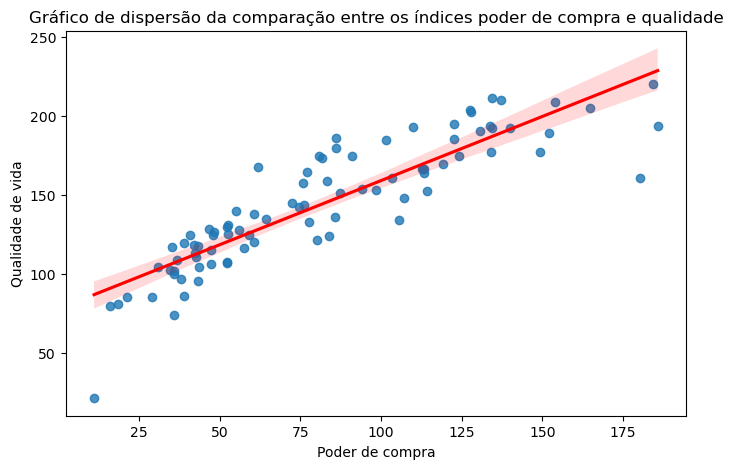

In [33]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Purchasing Power Index'], y=df['Quality of Life Index'], line_kws={'color':'red'})

plt.title('Gráfico de dispersão da comparação entre os índices poder de compra e qualidade')
plt.xlabel('Poder de compra')
plt.ylabel('Qualidade de vida')
plt.show()

### **h)** Explore a correlação entre "Health Care Index" e "Cost of Living Index" utilizando métodos estatísticos e visuais, e explique as técnicas estatísticas utilizadas

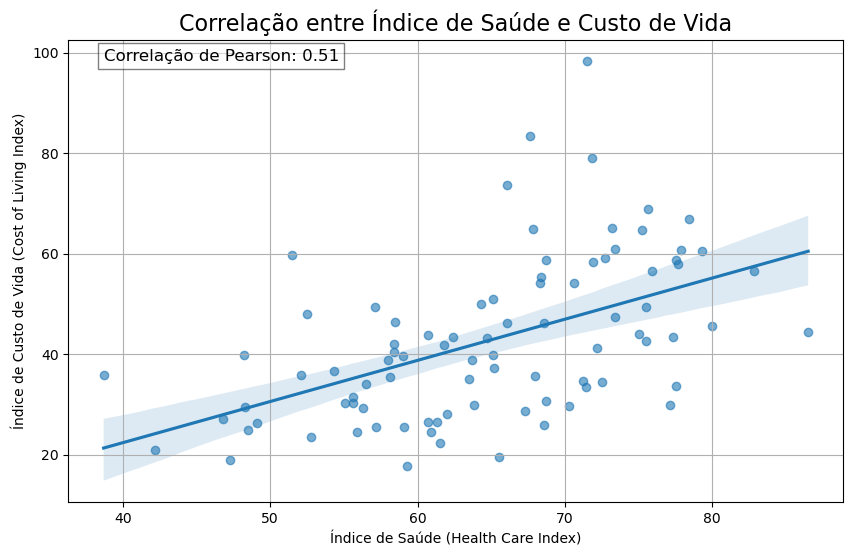

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('quality_of_life_indices_by_country_2.csv')

plt.figure(figsize=(10, 6))
sns.regplot(x='Health Care Index', y='Cost of Living Index', data=data, scatter_kws={'alpha':0.6})

correlation = data['Health Care Index'].corr(data['Cost of Living Index'])

plt.text(
    data['Health Care Index'].min(), 
    data['Cost of Living Index'].max(), 
    f'Correlação de Pearson: {correlation:.2f}', 
    fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Correlação entre Índice de Saúde e Custo de Vida', fontsize=16)
plt.xlabel('Índice de Saúde (Health Care Index)')
plt.ylabel('Índice de Custo de Vida (Cost of Living Index)')
plt.grid(True)

plt.show()


*Exemplo de resposta:*
A análise dos dados revela uma correlação moderada e positiva (coeficiente de Pearson = 0.51) entre o Índice de Saúde (Health Care Index) e o Índice de Custo de Vida (Cost of Living Index). Isso significa que, em geral, países com um sistema de saúde melhor tendem a ter um custo de vida mais elevado. Embora não seja uma correlação muito forte, indica que, em muitos casos, países que investem mais em saúde também possuem maiores custos gerais para seus habitantes.

Entretanto, é importante destacar que correlação não implica causalidade, ou seja, não é possível afirmar que um índice causa diretamente o outro. Fatores econômicos e sociais adicionais provavelmente influenciam essa relação.

## **Questão 2**

Com o intuito de apresentar suas descobertas para os habitantes de Zootopia, Judy precisa descobrir a melhor forma de expor os dados. Ela pensou em mostrá-los em um mapa interativo, entretanto não sabe fazer isso e precisa da sua ajuda para criar esse mapa.

### **a)** Utilizando Geopandas, busque métodos para produzir um mapa com todos os indices de qualidade de vida disponíveis no dataframe trabalhado.

Dica: Utilize gradientes de cores e busque por arquivos .shp para criar seu mapa, caso não conheça, pesquise sobre.

In [2]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('quality_of_life_indices_by_country_2.csv')

fig = px.choropleth(data_frame=data,
                    locations='Country',
                    locationmode='country names',
                    color='Quality of Life Index',
                    color_continuous_scale='Viridis',
                    title='Mapa Mundial da Qualidade de Vida por País')
fig.update_geos(showcoastlines=True, coastlinecolor="RebeccaPurple")

fig.show()